# 08052018 kinetic spec assay w/ new A.P dilutions

### specs
***
* **New: A.P dilutions aliquoted on 26042018 **
* **New: A.P now diluted in A.P assay buffer**
* **check for reproducibility**
* 750 uL total assay volume (in cuvette)
* 7 replicates
* no osmolytes
* no incubation
* samples measured at time of setup to establish linear range

reagent | final concentration
--- | --- | ---
New 50 mM A.P @ -80 deg C | 1 mg/mL (1/50 dilution) in A.P assay buffer
PNPP | 50 mg/mL

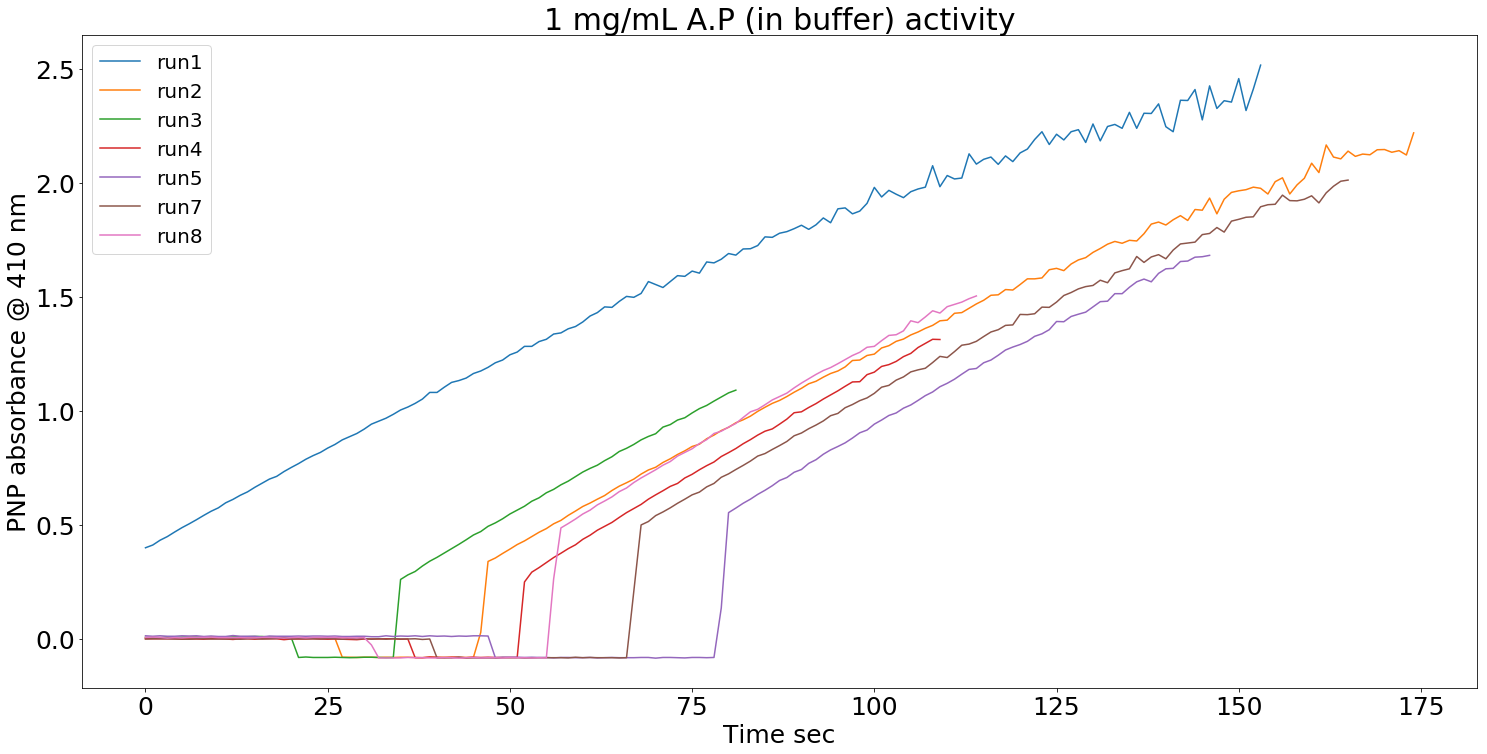

In [9]:
import csv
import sys
sys.path.insert(0, 'process_csv/')
from process_csv import *
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import requests
with open("dataset/ap_08052018.csv") as file:
    reader=csv.reader(file)
    data=list(reader)
header=data[0]
i=0
j=1
csvdict={}
while i<len(data[j]):
    csvdict[header[i]]=[]
    while j<len(data):
        csvdict[header[i]].append(data[j][i])
        j+=1
    j=1
    i+=1
for key,val in csvdict.items():
    val=list(map(float, [a for a in val if a]))
    csvdict[key]=val
for i in range(1,8):
    plt.plot(csvdict[header[i]],label=header[i])
plt.xlabel("Time sec")
plt.ylabel("PNP absorbance @ 410 nm")
plt.title("1 mg/mL A.P (in buffer) activity")
plt.rcParams["figure.figsize"] = [25,12]
plt.rcParams.update({'font.size': 25})
plt.legend(prop={'size': 20})

In [24]:
import statistics
run=range(1,8)
init_vel=[.01757,.01782,.01850,.01959,.01876,.01794,.02090]
print("run", ",", "init_vel /min")
min=[]
for x,y in zip(run,init_vel):
    min.append(60*y)
    print(x, ",", 60*y)
print("stdev:", np.std(min, dtype=np.float64))
print("mean ", statistics.mean(min))

run , init_vel /min
1 , 1.0542
2 , 1.0692
3 , 1.1099999999999999
4 , 1.1754
5 , 1.1256
6 , 1.0764
7 , 1.254
stdev: 0.06533419269183541
mean  1.1235428571428572


### Summary
***
Ran many replicates of same A.P concentration (1 mg/mL) to check for reproducibility of results.